# Plots and Results

## Import Libraries

In [1]:
from sklearn.metrics import auc,roc_curve
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data

In [2]:
metrics = pd.read_csv('metrics.csv', index_col='Index')
results = pickle.load(open('results.pkl', 'rb'))

## Utility Functions

In [3]:
##Plots train_loss and val_loss over the given epochs
def plot_loss(history):
    ## Input: History of model over many epochs.
    ## Output: Plots both losses over the given epochs
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,9))
    ax[0].plot(history['loss'])
    ax[0].plot(history['val_loss'])
    ax[0].set_title('Train Loss vs Validation Loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].legend(['Train', 'Validation'], loc='lower left')
    ax[1].plot(history['acc'])
    ax[1].plot(history['val_acc'])
    ax[1].set_title('Train Accuracy vs Validation Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].legend(['Train', 'Validation'], loc='lower right')
    plt.show()

##Plots train_loss and val_loss over the all epochs
def plot_all_loss(histories, names):
    ## Input: History of models over many epochs.
    ## Output: Plots both losses over the given epochs
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,9))
    for i in range(len(histories)):
        ax[0].plot(histories[i]['loss'])
        ax[1].plot(histories[i]['acc'])
    for i in range(len(histories)):
        ax[0].plot(histories[i]['val_loss'])
        ax[1].plot(histories[i]['val_acc'])
    ax[0].set_title('Train Loss vs Validation Loss')
    ax[1].set_title('Train Accuracy vs Validation Accuracy')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[0].legend(['Train {}'.format(x) for x in names] + ['Validation {}'.format(x) for x in names],
                 loc='lower left')
    ax[1].legend(['Train {}'.format(x) for x in names] + ['Validation {}'.format(x) for x in names],
                 loc='lower right')
    plt.show()

# Output: Plots ROCs of the models and prints results    
def display_final_results(models):
    ## Input: Results of the models in an array: [(fpr,tpr,model_name)]
    ## Output: Plots ROCs of the models and prints results
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))
    for model in models:
        fpr,tpr,name = model
        print("AUC for {} is {}".format(name,auc(fpr, tpr)))
        ax.plot(fpr, tpr,label=name)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title('ROC for binary classifiers')
    
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")
    plt.show()

## Approach 1

### Logistic Regression

In [4]:
print(metrics.loc['Logistic Regression'])

test_accuracy     0.720907
train_accuracy    0.722557
val_accuracy      0.715276
Name: Logistic Regression, dtype: float64


### Gaussian Naive-Bayes

In [5]:
print(metrics.loc['Gaussian NaiveBayes'])

test_accuracy     0.642227
train_accuracy    0.641869
val_accuracy      0.638677
Name: Gaussian NaiveBayes, dtype: float64


### Random Forest

In [6]:
print(metrics.loc['RandomForest'])

test_accuracy     0.657155
train_accuracy    0.656470
val_accuracy      0.653856
Name: RandomForest, dtype: float64


### Feed Forward Neural Network

In [7]:
print(metrics.loc['Feed Forward Neural Network'])

test_accuracy     0.779052
train_accuracy    0.808073
val_accuracy      0.765026
Name: Feed Forward Neural Network, dtype: float64


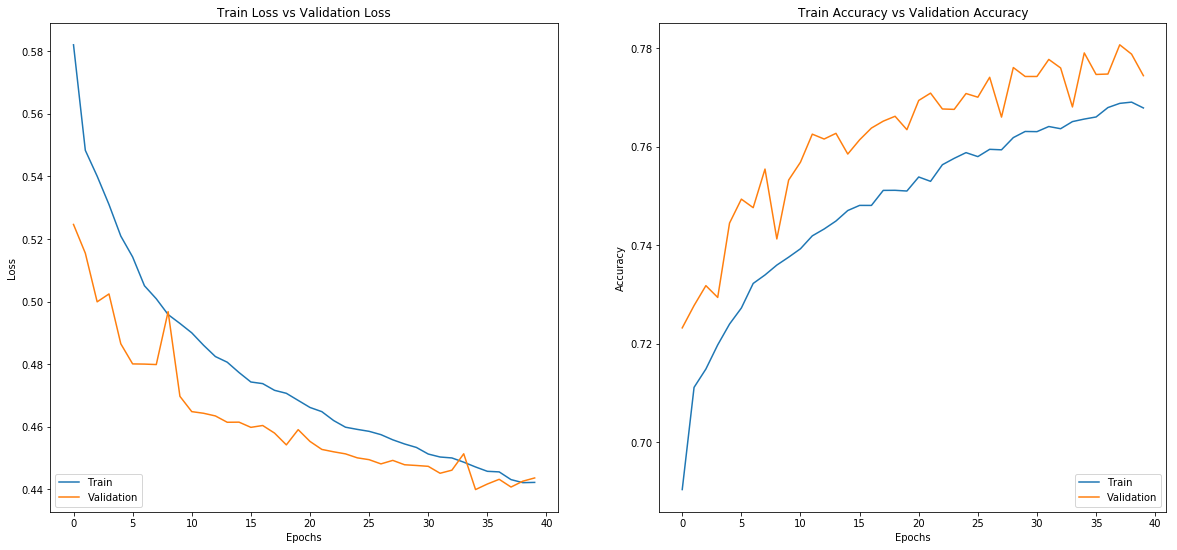

In [8]:
history = pd.read_csv(os.path.join('histories','feed_forward.csv'))
plot_loss(history)

## Approach 2

### LSTM

In [9]:
print(metrics.loc['LSTM'])

test_accuracy     0.809266
train_accuracy    0.855488
val_accuracy      0.808311
Name: LSTM, dtype: float64


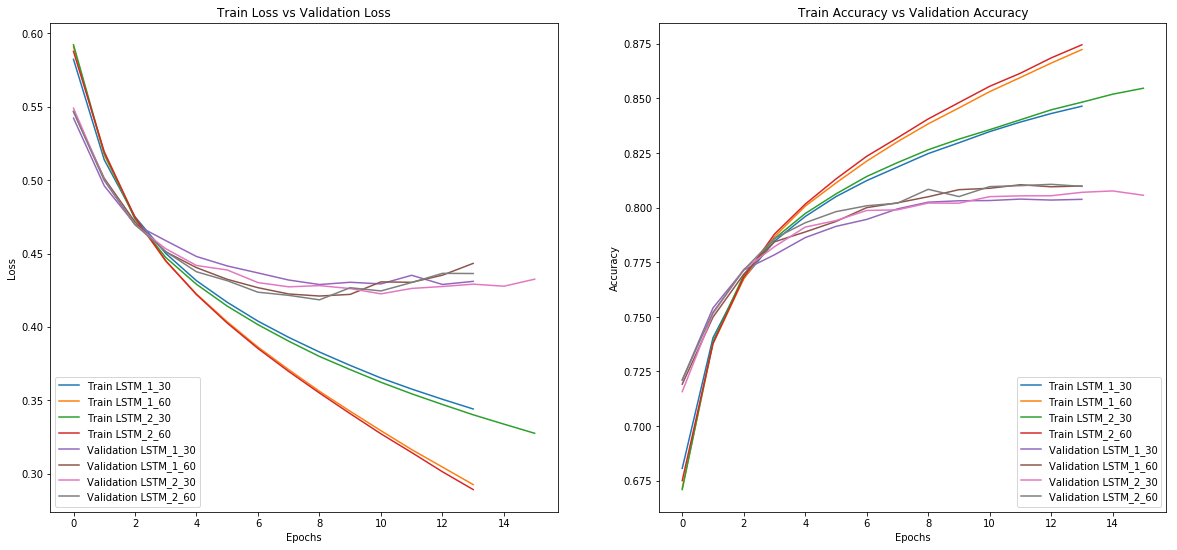

In [11]:
names = ['LSTM_1_30', 'LSTM_1_60', 'LSTM_2_30', 'LSTM_2_60']
histories = [pd.read_csv(os.path.join('histories','{}.csv'.format(x))) for x in names]
plot_all_loss(histories, names)

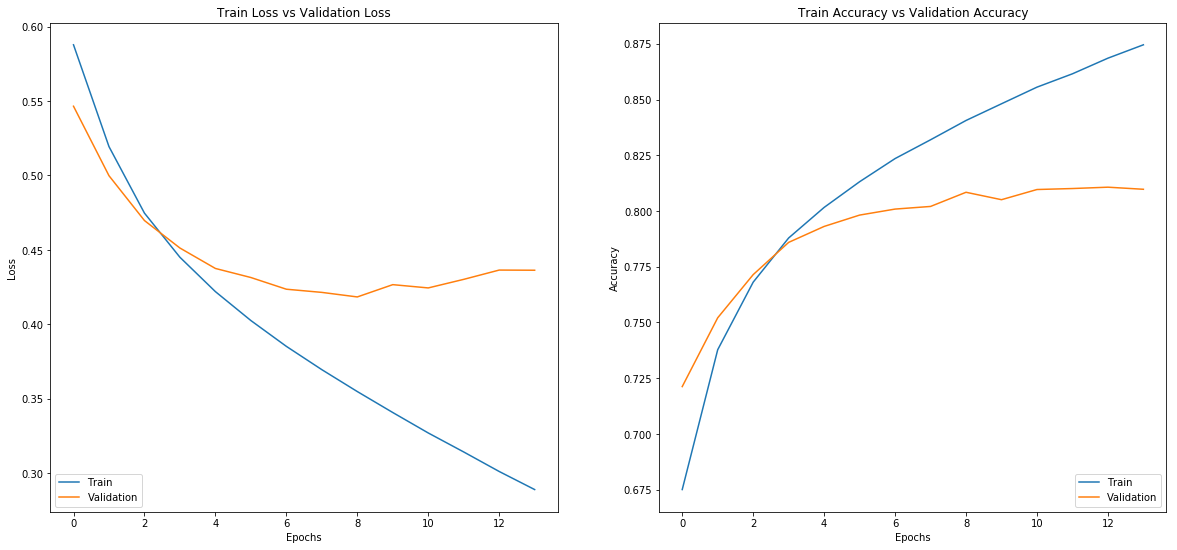

In [10]:
history = pd.read_csv(os.path.join('histories','LSTM_2_60.csv'))
plot_loss(history)

### Attention

In [12]:
print(metrics.loc['Attention'])

test_accuracy     0.799669
train_accuracy    0.869504
val_accuracy      0.801880
Name: Attention, dtype: float64


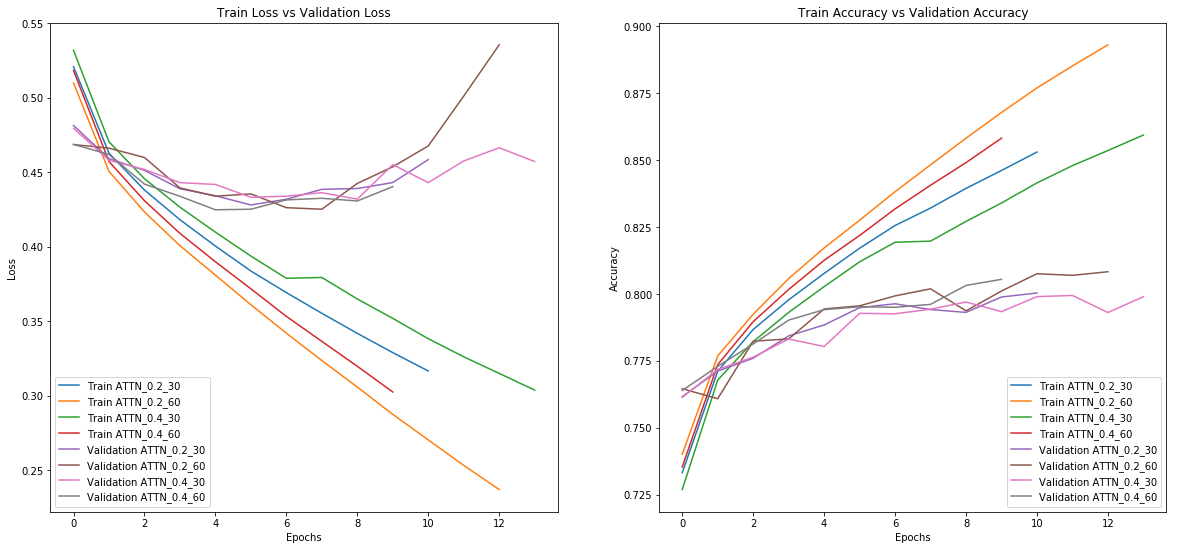

In [14]:
names = ['ATTN_0.2_30', 'ATTN_0.2_60', 'ATTN_0.4_30', 'ATTN_0.4_60']
histories = [pd.read_csv(os.path.join('histories','{}.csv'.format(x))) for x in names]
plot_all_loss(histories, names)

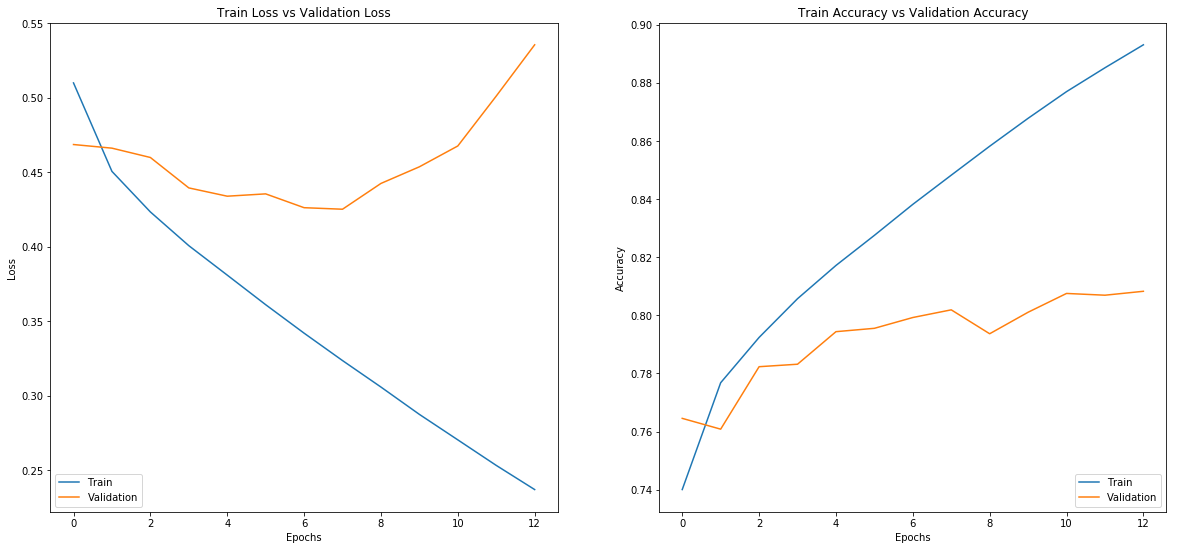

In [13]:
history = pd.read_csv(os.path.join('histories','ATTN_0.2_60.csv'))
plot_loss(history)

## Final Results

AUC for Logistic Regression is 0.779552006786
AUC for Gaussian NaiveBayes is 0.680391470067
AUC for RandomForest is 0.767442221455
AUC for Feed Forward Neural Network is 0.862486372454
AUC for LSTM is 0.882196537327
AUC for Attention is 0.87976016616


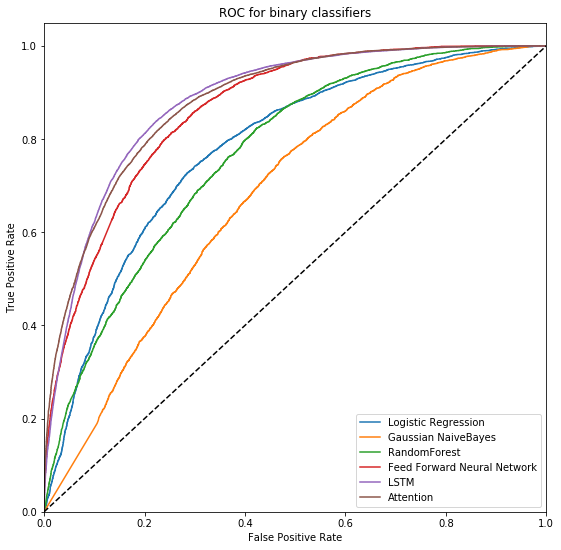

In [15]:
display_final_results(results)